In [1]:
import pandas as pd

# Loading the dataset
df=pd.read_csv('Titanic-Dataset.csv')

# Printing 1st 5 elements
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Droping irrelevant columns
df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

# Converting categorical variables into numeric ones
df['Sex']=df['Sex'].map({'male': 0, 'female': 1})
df['Embarked']=df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Checking the updated dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [3]:
from sklearn.model_selection import train_test_split

# Features and target variables
X=df.drop(columns=['Survived'])
y=df['Survived']

# Spliting the data (80% train, 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# 1. Displaying passengers who survived
print("Passengers who survived:")
survived_info=df[df['Survived']==1]
print(survived_info)

# 2. Display passengers who did not survive
print("\nPassengers who did not survive:")
not_survived_info=df[df['Survived']==0]
print(not_survived_info)


Passengers who survived:
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1           1       1    1  38.0      1      0  71.2833         0
2           1       3    1  26.0      0      0   7.9250         2
3           1       1    1  35.0      1      0  53.1000         2
8           1       3    1  27.0      0      2  11.1333         2
9           1       2    1  14.0      1      0  30.0708         0
..        ...     ...  ...   ...    ...    ...      ...       ...
875         1       3    1  15.0      0      0   7.2250         0
879         1       1    1  56.0      0      1  83.1583         0
880         1       2    1  25.0      0      1  26.0000         2
887         1       1    1  19.0      0      0  30.0000         2
889         1       1    0  26.0      0      0  30.0000         0

[342 rows x 8 columns]

Passengers who did not survive:
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500     

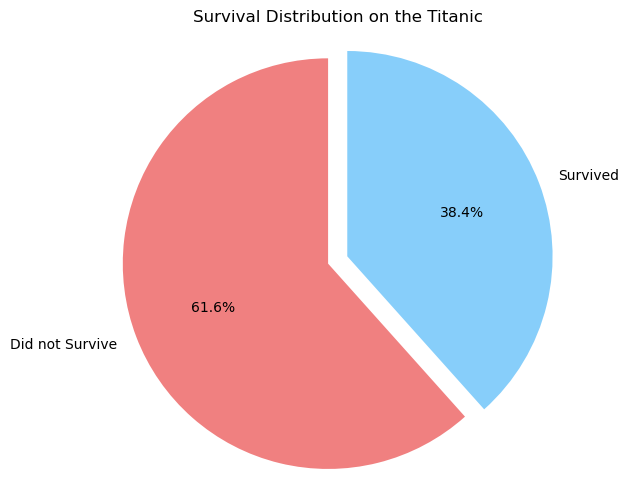

In [12]:
import matplotlib.pyplot as plt

# Counting the number of people who survived and who didn't
survived_count=df['Survived'].value_counts()

# Labels for the pie chart
labels=['Did not Survive','Survived']

# Colors for the pie chart
colors=['lightcoral','lightskyblue']

# Ploting 
plt.figure(figsize=(6,6))
plt.pie(survived_count,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,explode=(0, 0.1))
plt.title('Survival Distribution on the Titanic')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


In [10]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    # Creating a dataframe for a single instance
    person_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [1 if sex == 'female' else 0],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Embarked': [embarked]  
    })
    
    # Predicting the survival
    survival = model.predict(person_data)
    
    # Returning the result
    if survival == 1:
        return "Survived"
    else:
        return "Did not Survive"

# Example 
result = predict_survival(pclass=1, sex='female', age=38, sibsp=1, parch=0, fare=71.2833, embarked=0)
print(f"Prediction: {result}")

Prediction: Survived


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions on the test set
y_pred=model.predict(X_test)

# Evaluating the accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')

# Detailed classification 
print(classification_report(y_test,y_pred))


Accuracy:81.56%
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

